In [1]:
%%capture
import pandas as pd
import matplotlib as ml
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

%matplotlib inline

In [2]:
df = pd.read_csv('Clean_Automobiles_model_df.csv')

df.head()

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,stroke,compression-ratio,horsepower,peak-rpm,city-km/L,highway-km/L,price,four-wheel drive,front-wheel drive,rear-wheel drive
0,0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,...,2.68,9.0,111,5000.0,8.94,11.49,13495.0,0,0,1
1,1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,...,2.68,9.0,111,5000.0,8.94,11.49,16500.0,0,0,1
2,2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,...,3.47,9.0,154,5000.0,8.09,11.06,16500.0,0,0,1
3,3,2,164,audi,gas,std,four,sedan,fwd,front,...,3.40,10.0,102,5500.0,10.21,12.77,13950.0,0,1,0
4,4,2,164,audi,gas,std,four,sedan,4wd,front,...,3.40,8.0,115,5500.0,7.66,9.36,17450.0,1,0,0


In [3]:
df.drop(['Unnamed: 0'],inplace=True, axis=1)


In [4]:
x = df[['horsepower', 'curb-weight', 'engine-size','width','highway-km/L','length','wheel-base','city-km/L','bore','four-wheel drive','rear-wheel drive','front-wheel drive']]
print("Shape:",x.shape)
y=df['price']

Shape: (201, 12)


<h2>Model Development</h2>

<h3>Functions for plotting</h3>

In [6]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

<h3>Model.1: Multiple Linear Regression</h3>

In [7]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [8]:
lm.fit(x_train, y_train)
#print("Intercept=",lm.intercept_)
#print("Coefficients=",lm.coef_)
y_hat_train = lm.predict(x_train)
y_hat_test = lm.predict(x_test)
#y_hat_train[:5]

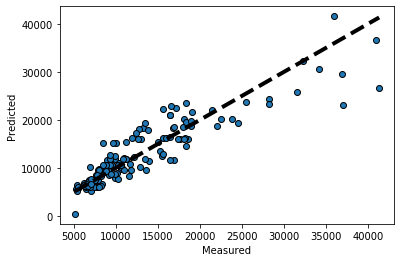

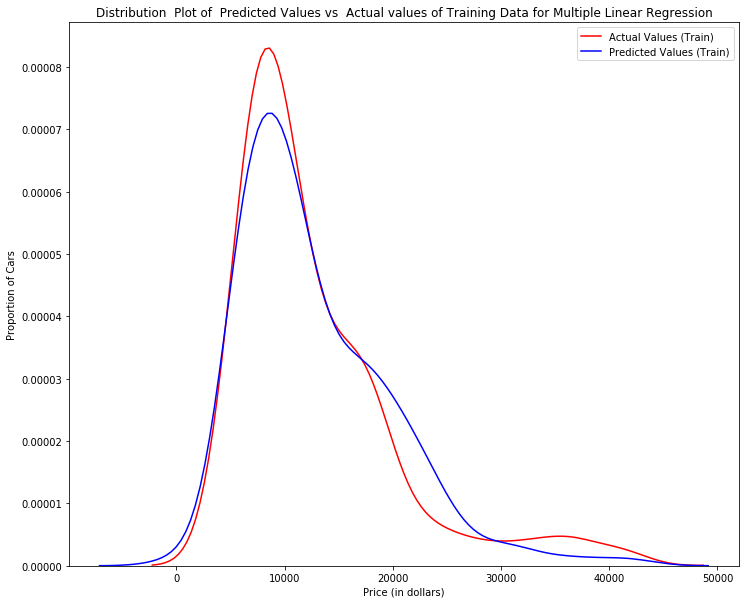

In [9]:
from sklearn import linear_model
fig, ax = plt.subplots()
ax.scatter(y_train,y_hat_train , edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
Title = 'Distribution  Plot of  Predicted Values vs  Actual values of Training Data for Multiple Linear Regression'
DistributionPlot(y_train, y_hat_train,"Actual Values (Train)", "Predicted Values (Train)",Title)

Text(0, 0.5, 'Error of Prediction')

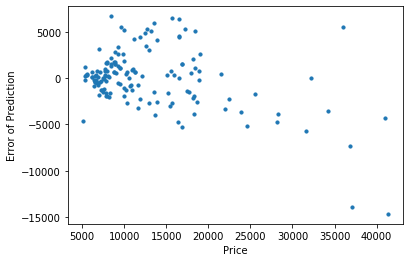

In [10]:
plt.scatter(y_train,y_hat_train-y_train, s=10)
plt.xlabel('Price')
plt.ylabel('Error of Prediction')

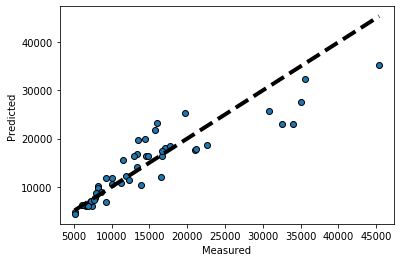

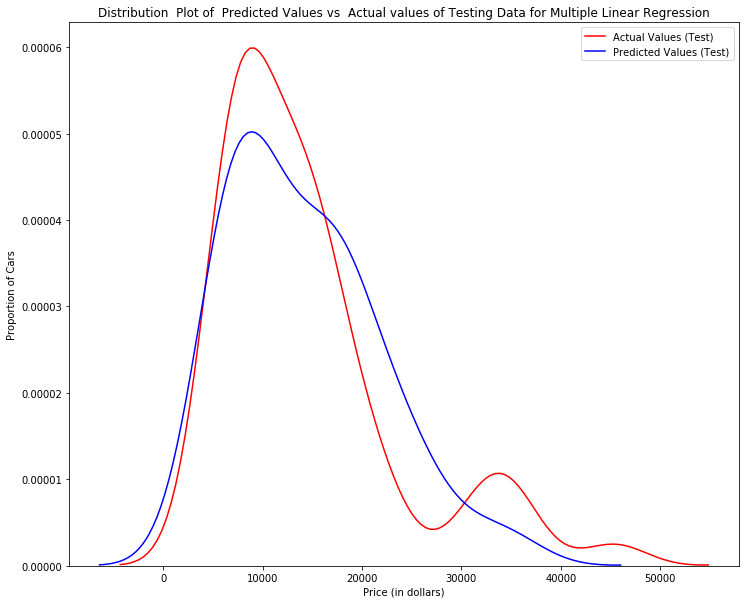

In [11]:
from sklearn import linear_model
fig, ax = plt.subplots()
ax.scatter(y_test,y_hat_test , edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

plt.show()
Title = 'Distribution  Plot of  Predicted Values vs  Actual values of Testing Data for Multiple Linear Regression'
DistributionPlot(y_test, y_hat_test,"Actual Values (Test)", "Predicted Values (Test)",Title)

Text(0, 0.5, 'Error of Prediction')

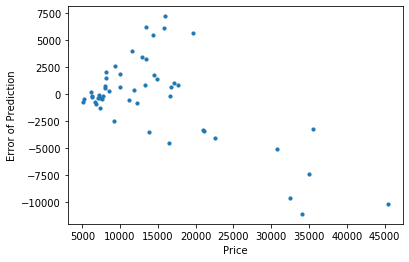

In [12]:
plt.scatter(y_test,y_hat_test-y_test, s=10)
plt.xlabel('Price')
plt.ylabel('Error of Prediction')

<h3> Model.2: Polynomial Regression</h3>

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

<h4>For 2nd Degree polynomial</h4> 

In [14]:
pr2=PolynomialFeatures(degree=2)
Z_pr_train2=pr2.fit_transform(x_train)
plm2 = linear_model.LinearRegression()
plm2.fit(Z_pr_train2, y_train)

#print ('Coefficients: ', plm2.coef_)
#print ('Intercept: ',plm2.intercept_)

y_plm_train2= plm2.predict(Z_pr_train2)
Z_pr_test2=pr2.fit_transform(x_test)
y_plm_test2= plm2.predict(Z_pr_test2)


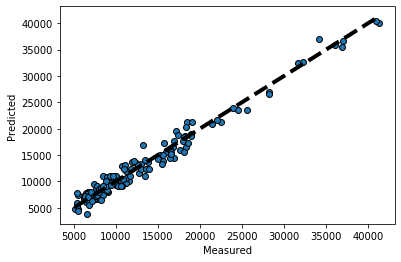

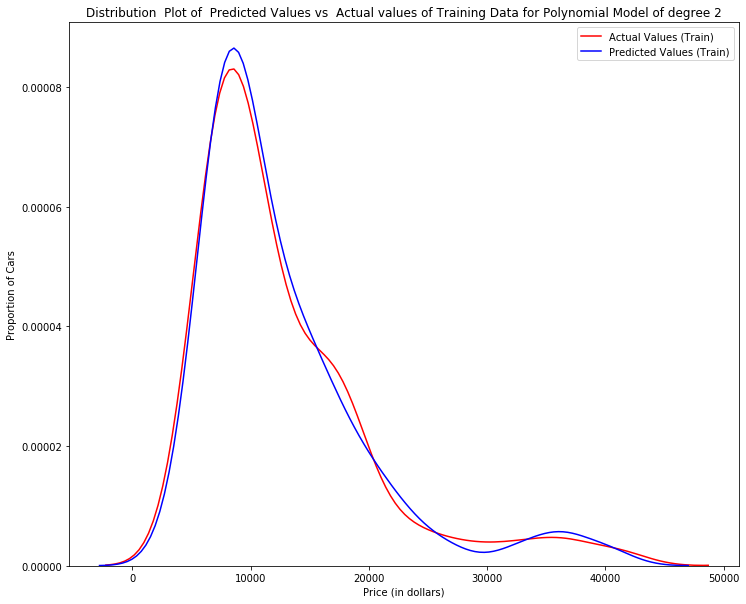

In [15]:
from sklearn import linear_model
fig, ax = plt.subplots()
ax.scatter(y_train,y_plm_train2 , edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
                 
            
plt.show()
Title = 'Distribution  Plot of  Predicted Values vs  Actual values of Training Data for Polynomial Model of degree 2'
DistributionPlot(y_train, y_plm_train2,"Actual Values (Train)", "Predicted Values (Train)",Title)

Text(0, 0.5, 'Error of Prediction')

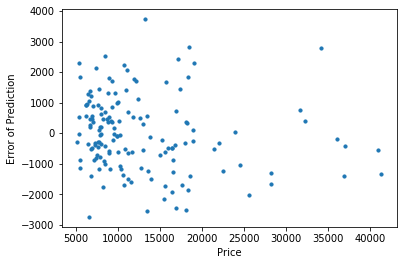

In [16]:
plt.scatter(y_train,y_plm_train2-y_train, s=10)
plt.xlabel('Price')
plt.ylabel('Error of Prediction')

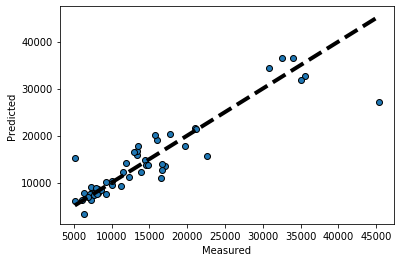

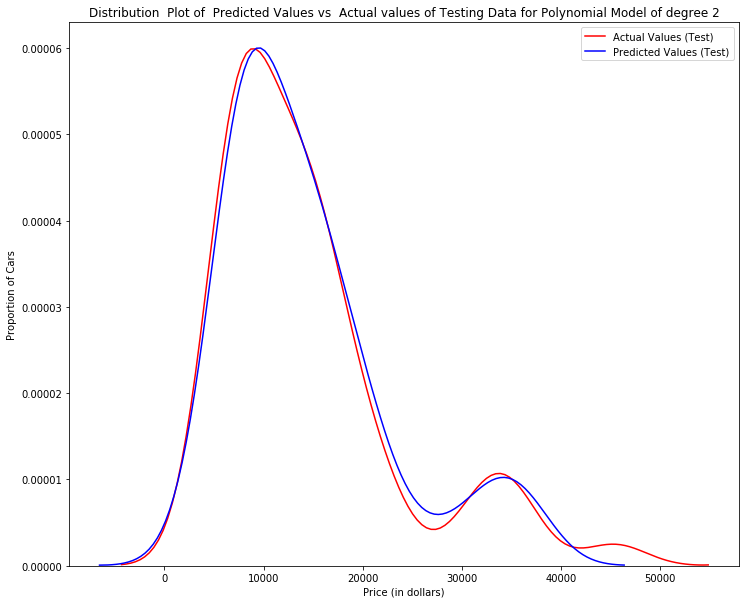

In [17]:
from sklearn import linear_model
fig, ax = plt.subplots()
ax.scatter(y_test,y_plm_test2 , edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
               
            
plt.show()
Title = 'Distribution  Plot of  Predicted Values vs  Actual values of Testing Data for Polynomial Model of degree 2'
DistributionPlot(y_test, y_plm_test2,"Actual Values (Test)", "Predicted Values (Test)",Title)

Text(0, 0.5, 'Error of Prediction')

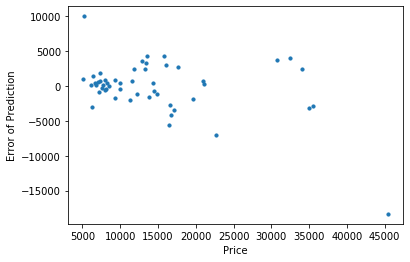

In [18]:
plt.scatter(y_test,y_plm_test2-y_test, s=10)
plt.xlabel('Price')
plt.ylabel('Error of Prediction')

<h3>Model.3: Decision Tree Regressor Model</h3>


In [19]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
dt_pr_train=dt.predict(x_train)
dt_pr_test=dt.predict(x_test)

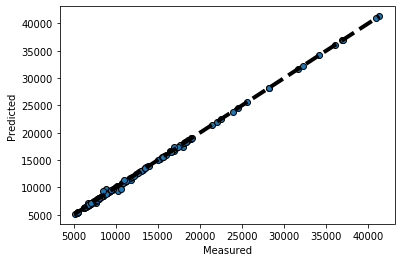

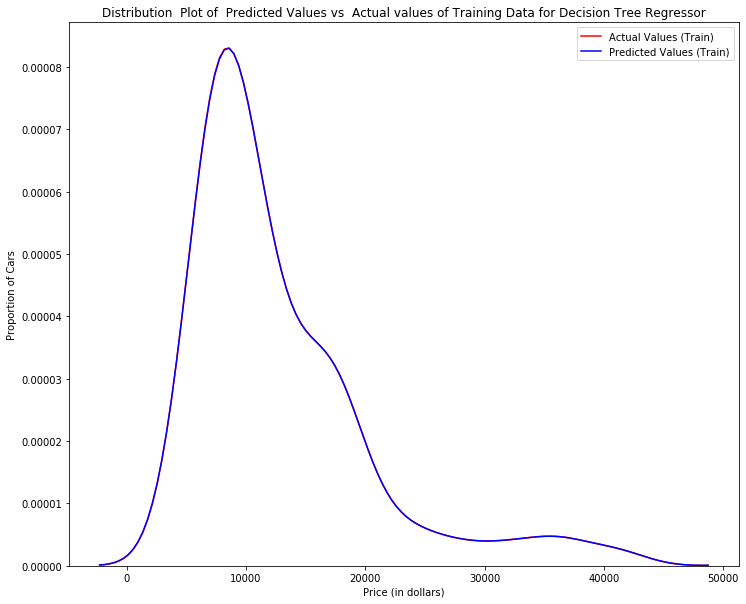

In [20]:
from sklearn import linear_model
fig, ax = plt.subplots()
ax.scatter(y_train,dt_pr_train , edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

plt.show()
Title = 'Distribution  Plot of  Predicted Values vs  Actual values of Training Data for Decision Tree Regressor'
DistributionPlot(y_train, dt_pr_train,"Actual Values (Train)", "Predicted Values (Train)",Title)

Text(0, 0.5, 'Error of Prediction')

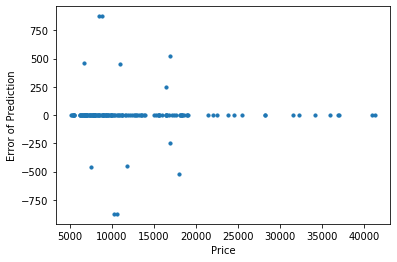

In [21]:
plt.scatter(y_train,dt_pr_train-y_train, s=10)
plt.xlabel('Price')
plt.ylabel('Error of Prediction')

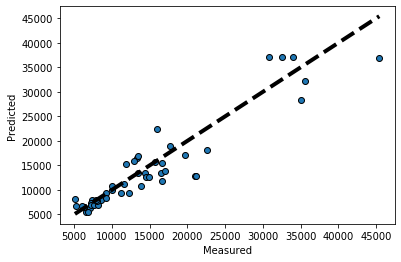

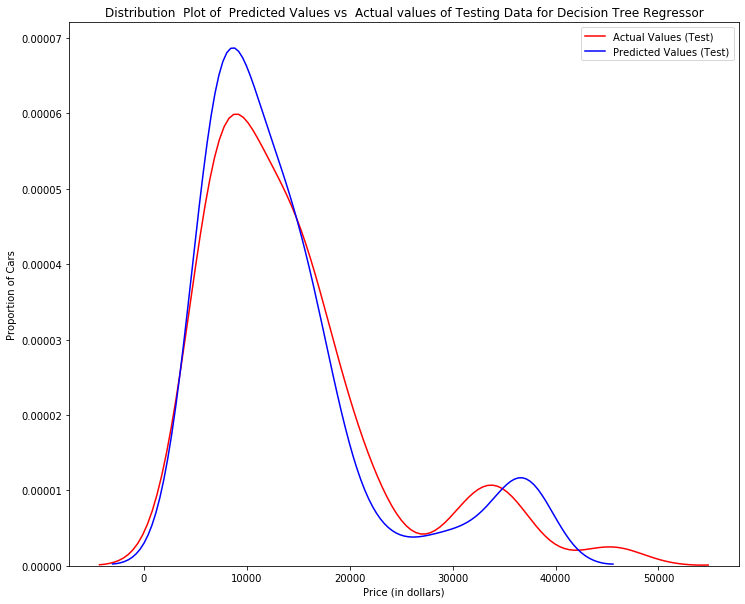

In [22]:
from sklearn import linear_model
fig, ax = plt.subplots()
ax.scatter(y_test,dt_pr_test , edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

plt.show()
Title = 'Distribution  Plot of  Predicted Values vs  Actual values of Testing Data for Decision Tree Regressor'
DistributionPlot(y_test, dt_pr_test,"Actual Values (Test)", "Predicted Values (Test)",Title)

Text(0, 0.5, 'Error of Prediction')

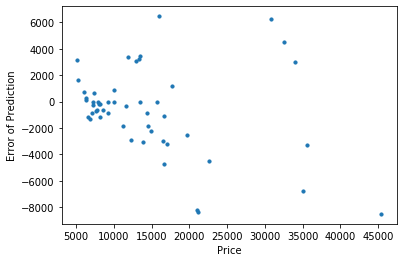

In [23]:
plt.scatter(y_test,dt_pr_test-y_test, s=10)
plt.xlabel('Price')
plt.ylabel('Error of Prediction')

<h3>Model.4: Random Forest Regression </h3>


In [24]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()
rf.fit(x_train, y_train)
rf_pr_train=rf.predict(x_train)
rf_pr_test=rf.predict(x_test)


C:\Users\msalm\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


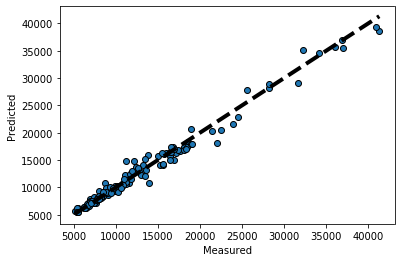

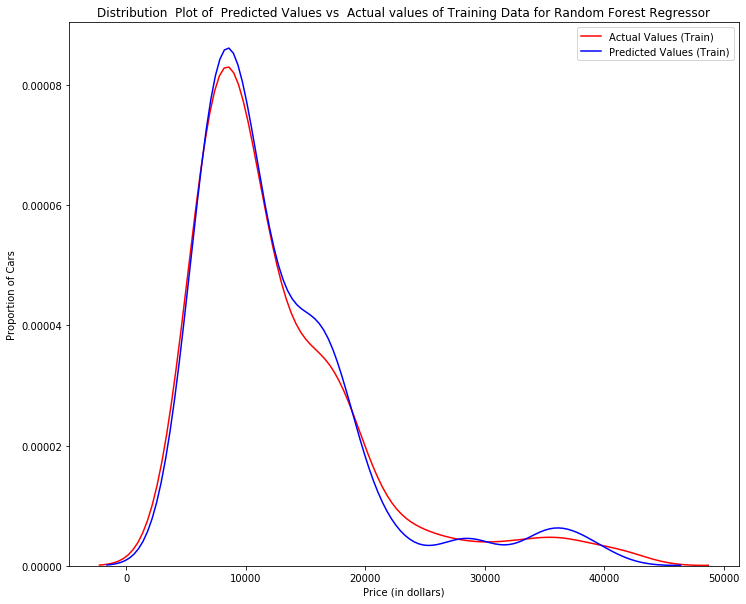

In [25]:
from sklearn import linear_model
fig, ax = plt.subplots()
ax.scatter(y_train,rf_pr_train , edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

plt.show()
Title = 'Distribution  Plot of  Predicted Values vs  Actual values of Training Data for Random Forest Regressor'
DistributionPlot(y_train, rf_pr_train,"Actual Values (Train)", "Predicted Values (Train)",Title)

Text(0, 0.5, 'Error of Prediction')

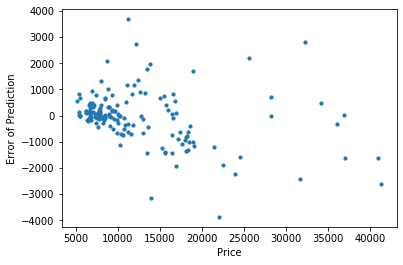

In [26]:
plt.scatter(y_train,rf_pr_train-y_train, s=10)
plt.xlabel('Price')
plt.ylabel('Error of Prediction')

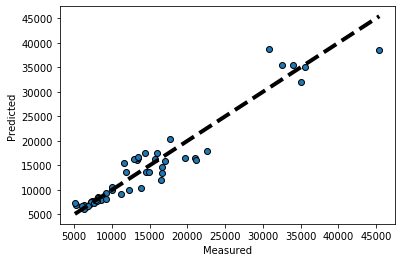

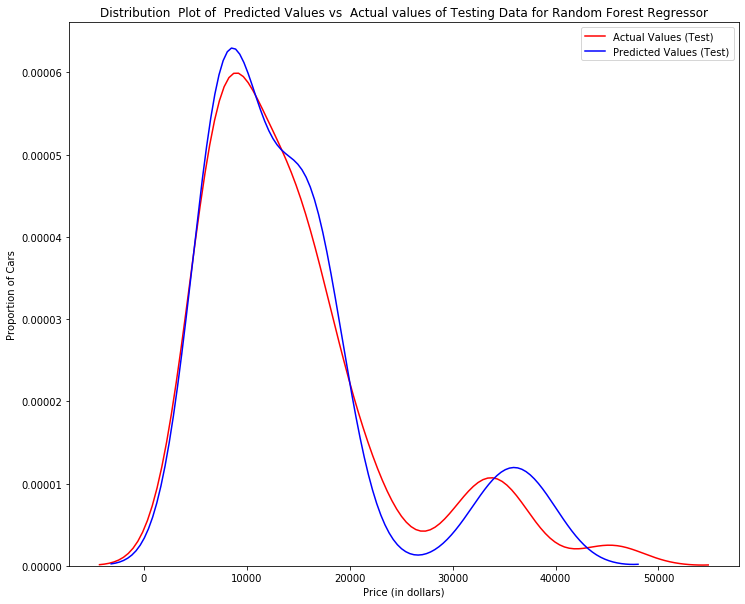

In [27]:
from sklearn import linear_model
fig, ax = plt.subplots()
ax.scatter(y_test,rf_pr_test , edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

plt.show()
Title = 'Distribution  Plot of  Predicted Values vs  Actual values of Testing Data for Random Forest Regressor'
DistributionPlot(y_test, rf_pr_test,"Actual Values (Test)", "Predicted Values (Test)",Title)

Text(0, 0.5, 'Error of Prediction')

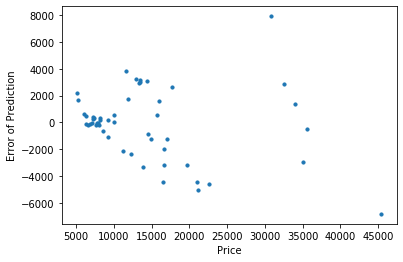

In [28]:
plt.scatter(y_test,rf_pr_test-y_test, s=10)
plt.xlabel('Price')
plt.ylabel('Error of Prediction')

<h3>Measures for In-Sample Evaluation</h3>

In [29]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

<h4>For Model.1: Multiple Linear Regression Model</h4>

<h4>Train data</h4>

In [30]:
r2_mlr=r2_score(y_train, y_hat_train)
mse_mlr=np.sqrt(mean_squared_error(y_train, y_hat_train))

print('The R-square is                                                     : ',r2_mlr)
print('The mean square error of price and predicted value using multifit is: ',mse_mlr )

The R-square is                                                     :  0.8261090198194851
The mean square error of price and predicted value using multifit is:  3117.2174159273736


<h4>Test data</h4>

In [31]:
print('The R-square is                                                     : ',r2_score(y_test, y_hat_test))
print('The mean square error of price and predicted value using multifit is: ', np.sqrt(mean_squared_error(y_test, y_hat_test)))


The R-square is                                                     :  0.8199921938797268
The mean square error of price and predicted value using multifit is:  3822.53427931759


<h4>For Model.2: Polynomial Regression Model</h4>

<h4>Train data</h4>

In [32]:
print("R2-score                                                            : " , r2_score(y_plm_train2 , y_train) )
print('The mean square error of price and predicted value using multifit is: ', np.sqrt(mean_squared_error(y_plm_train2 , y_train)))

R2-score                                                            :  0.9728897716360144
The mean square error of price and predicted value using multifit is:  1214.0961703710946


<h4>Test data</h4>

In [33]:
print("R2-score                                                            : " , r2_score(y_plm_test2 , y_test) )
print('The mean square error of price and predicted value using multifit is: ', np.sqrt(mean_squared_error(y_plm_test2 , y_test)))

R2-score                                                            :  0.7875547296427889
The mean square error of price and predicted value using multifit is:  3788.873951633092


<h4>For Model.3: Decision Tree Regressor Model</h4>


<h4>Train data</h4>

In [34]:
print("R2-score                                                            : " , r2_score(dt_pr_train , y_train) )
print('The mean square error of price and predicted value using multifit is: ', np.sqrt(mean_squared_error(dt_pr_train , y_train)))

R2-score                                                            :  0.999455478021352
The mean square error of price and predicted value using multifit is:  174.38858907623515


<h4>Test data</h4>

In [35]:
print("R2-score                                                            : " , r2_score(dt_pr_test , y_test))
print('The mean square error of price and predicted value using multifit is: ', np.sqrt(mean_squared_error(dt_pr_test , y_test)))

R2-score                                                            :  0.8580154523648853
The mean square error of price and predicted value using multifit is:  3265.157045137609


<h4>For Model.4: Random Forest Regressor Model</h4>


<h4>Train data</h4>

In [36]:
print("R2-score                                                            : " , r2_score(rf_pr_train , y_train) )
print('The mean square error of price and predicted value using multifit is: ', np.sqrt(mean_squared_error(rf_pr_train , y_train)))

R2-score                                                            :  0.9801360408310045
The mean square error of price and predicted value using multifit is:  1017.2231585651676


<h4>Test data</h4>

In [37]:
print("R2-score                                                            : " , r2_score(rf_pr_test , y_test))
print('The mean square error of price and predicted value using multifit is: ', np.sqrt(mean_squared_error(rf_pr_test , y_test)))

R2-score                                                            :  0.9113341953452577
The mean square error of price and predicted value using multifit is:  2625.9099075152944



|     Model Name                    |   R^2 Score    |                 |     RMSE      |                |
|-----------------------------------|----------------|-----------------|---------------|----------------|
|                                   |   Train Data   |    Test Data    |   Train Data  |  Test Data     |
|-----------------------------------|----------------|-----------------|---------------|----------------|
| Multiple Linear Regression Model  |    0.8261      |    0.8199       | 3117.2174     | 3822.5342      |                      
|-----------------------------------|----------------|-----------------|---------------|----------------|
| Polynomial Regression Model       |    0.9729      |    0.7875       | 1214.0961     | 3788.8739      |
|-----------------------------------|----------------|-----------------|---------------|----------------|
| Decision Tree Regressor Model     |    0.9994      |    0.8630       |  174.3885     | 3328.8639      |
|-----------------------------------|----------------|-----------------|---------------|----------------|
| Random Forest Regressor Model     |    0.9804      |    0.9094       | 1011.4426     | 2684.2192      |
|-----------------------------------|----------------|---------------------------------|----------------|



# Using Cross Validation For better modeling

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model


<h3>Model.1: Multiple Linear Regression</h3>

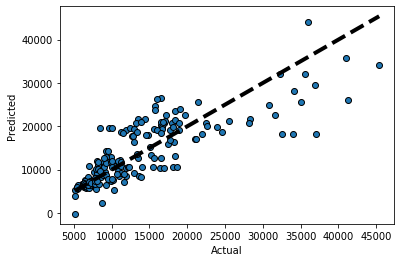

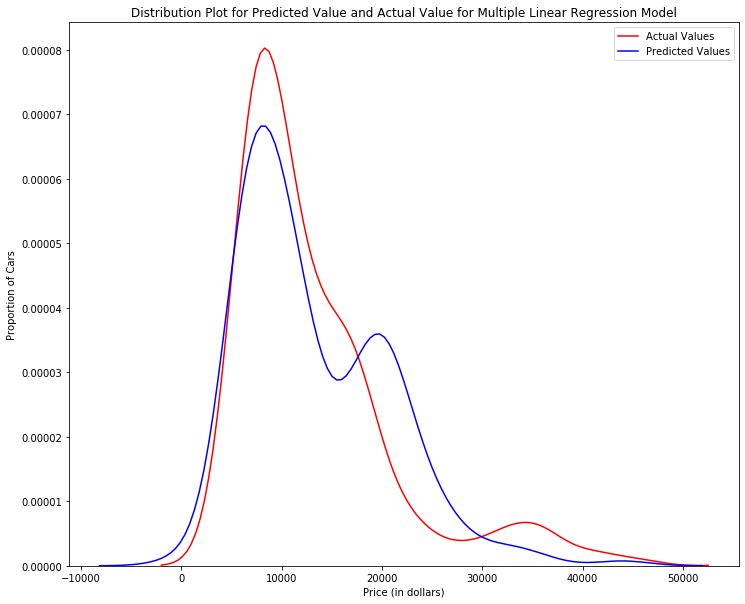

In [39]:
predicted_lm = cross_val_predict(lm, x, y, cv=4)
fig, ax = plt.subplots()
ax.scatter(y, predicted_lm, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()
Title = 'Distribution Plot for Predicted Value and Actual Value for Multiple Linear Regression Model'
DistributionPlot(y, predicted_lm,"Actual Values", "Predicted Values",Title)


<h3> Model.2: Polynomial Regression</h3>

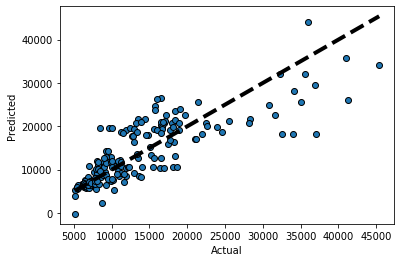

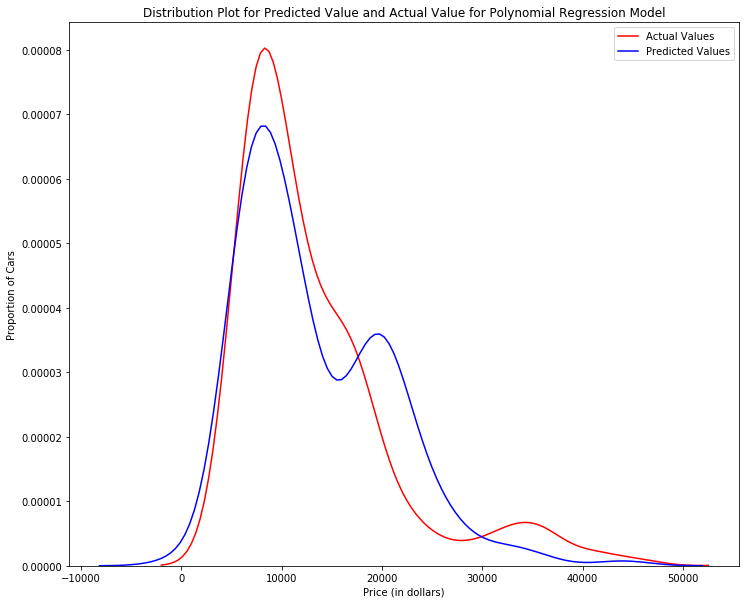

In [40]:
predicted_plm2 = cross_val_predict(plm2, x, y, cv=4)
fig, ax = plt.subplots()
ax.scatter(y, predicted_plm2, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()
Title = 'Distribution Plot for Predicted Value and Actual Value for Polynomial Regression Model'
DistributionPlot(y, predicted_plm2,"Actual Values", "Predicted Values",Title)


<h3>Model.3: Decision Tree Regressor Model</h3>


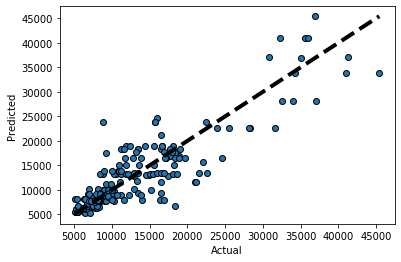

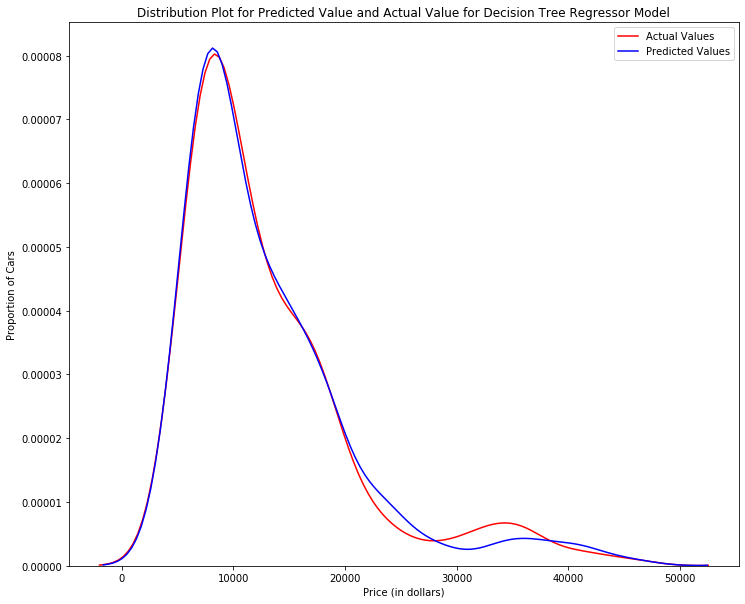

In [41]:
predicted_dt = cross_val_predict(dt, x, y, cv=4)
fig, ax = plt.subplots()
ax.scatter(y, predicted_dt, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()
Title = 'Distribution Plot for Predicted Value and Actual Value for Decision Tree Regressor Model'
DistributionPlot(y, predicted_dt,"Actual Values", "Predicted Values",Title)

<h3>Model.4: Random Forest Regressor Model</h3>


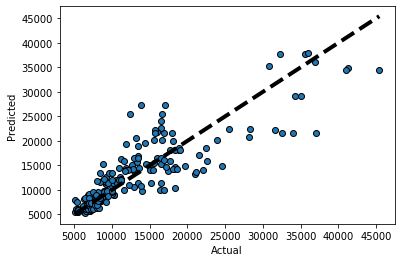

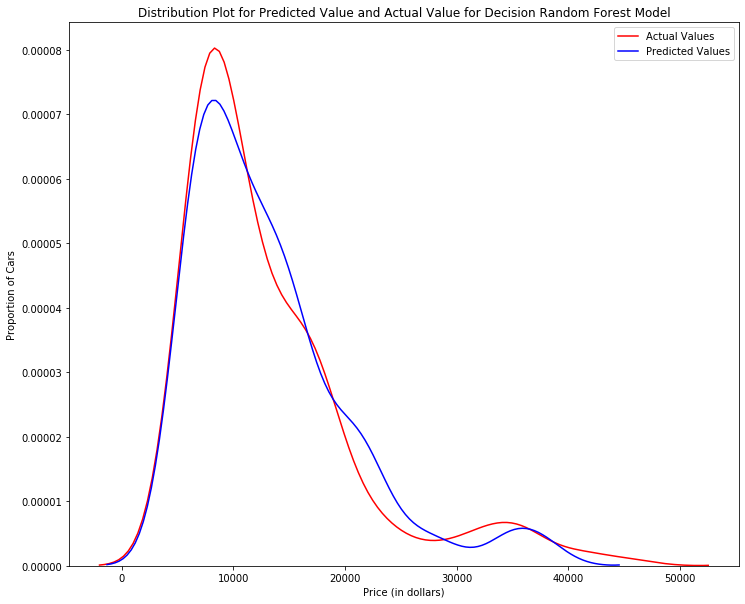

In [42]:
predicted_rf = cross_val_predict(rf, x, y, cv=4)
fig, ax = plt.subplots()
ax.scatter(y, predicted_rf, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()
Title = 'Distribution Plot for Predicted Value and Actual Value for Decision Random Forest Model'
DistributionPlot(y, predicted_rf,"Actual Values", "Predicted Values",Title)

In [43]:
Rcross_lm   = cross_val_score(lm, x, y, cv=4)
Rcross_dt   = cross_val_score(dt, x, y, cv=4)
Rcross_rf   = cross_val_score(rf, x, y, cv=4)
Rcross_plm2 = cross_val_score(plm2, x, y, cv=4)
print(Rcross_lm)
print(Rcross_dt)
print(Rcross_rf)
print(Rcross_plm2)

[ 0.8464021   0.79856267  0.4373113  -0.25548059]
[ 0.84845273  0.88019524  0.71204076 -0.09765376]
[0.88868529 0.86938261 0.46828487 0.51315629]
[ 0.8464021   0.79856267  0.4373113  -0.25548059]


In [44]:
m_score_lm=-1 * cross_val_score(lm,x, y,cv=4,scoring='neg_mean_squared_error')
m_score_plm2=-1 * cross_val_score(plm2,x, y,cv=4,scoring='neg_mean_squared_error')
m_score_dt=-1 * cross_val_score(dt,x, y,cv=4,scoring='neg_mean_squared_error')
m_score_rf=-1 * cross_val_score(rf,x, y,cv=4,scoring='neg_mean_squared_error')

In [45]:
rmse_scores_lm =np.sqrt(m_score_lm)
rmse_scores_plm2 =np.sqrt(m_score_plm2)
rmse_scores_dt =np.sqrt(m_score_dt)
rmse_scores_rf =np.sqrt(m_score_rf)
print(rmse_scores_lm)
print(rmse_scores_plm2)
print(rmse_scores_dt)
print(rmse_scores_rf)


[3715.30926248 4272.06745761 5289.93116019 4813.52217862]
[3715.30926248 4272.06745761 5289.93116019 4813.52217862]
[3992.52303393 3958.7222364  3266.80371158 4384.35659362]
[3221.42774966 3781.23131629 3756.19992038 2663.72797809]


In [46]:
s_mse=[]
s_r_score=[]
s1={1:lm,2:plm2,3:dt,4:rf}

In [47]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean:",round(scores.mean(),4))
    print("Standard deviation: ",round(scores.std(),4))
    return(round(scores.mean(),4))

In [48]:
s_r_score.append(print_scores(Rcross_lm))
s_r_score.append(print_scores(Rcross_plm2))
s_r_score.append(print_scores(Rcross_dt))
s_r_score.append(print_scores(Rcross_rf))

Scores: [ 0.8464021   0.79856267  0.4373113  -0.25548059]
Mean: 0.4567
Standard deviation:  0.4405
Scores: [ 0.8464021   0.79856267  0.4373113  -0.25548059]
Mean: 0.4567
Standard deviation:  0.4405
Scores: [ 0.84845273  0.88019524  0.71204076 -0.09765376]
Mean: 0.5858
Standard deviation:  0.3996
Scores: [0.88868529 0.86938261 0.46828487 0.51315629]
Mean: 0.6849
Standard deviation:  0.1949


In [49]:
s_mse.append(print_scores(rmse_scores_lm))
s_mse.append(print_scores(rmse_scores_plm2))
s_mse.append(print_scores(rmse_scores_dt))
s_mse.append(print_scores(rmse_scores_rf))

Scores: [3715.30926248 4272.06745761 5289.93116019 4813.52217862]
Mean: 4522.7075
Standard deviation:  589.0496
Scores: [3715.30926248 4272.06745761 5289.93116019 4813.52217862]
Mean: 4522.7075
Standard deviation:  589.0496
Scores: [3992.52303393 3958.7222364  3266.80371158 4384.35659362]
Mean: 3900.6014
Standard deviation:  402.3513
Scores: [3221.42774966 3781.23131629 3756.19992038 2663.72797809]
Mean: 3355.6467
Standard deviation:  457.8022


In [50]:
print('Mean for R-score: ',s_r_score)
print('mean for mean_squared_error: ',s_mse)

Mean for R-score:  [0.4567, 0.4567, 0.5858, 0.6849]
mean for mean_squared_error:  [4522.7075, 4522.7075, 3900.6014, 3355.6467]



|     Model Name                    |  R^2 Score   |                     |   RMSE      |                    |
|-----------------------------------|--------------|---------------------|-------------|--------------------|
|                                   |   Mean       | Standard deviation  |   Mean      | Standard deviation |
|-----------------------------------|--------------|---------------------|-------------|--------------------|
| Multiple Linear Regression Model  |    0.5317    |    0.2924           |   4475.1944 |   552.9199         |                 
|-----------------------------------|--------------|---------------------|-------------|--------------------|
| Polynomial Regression Model       |    0.5317    |    0.2924           |   4475.1944 |   552.9199         |
|-----------------------------------|--------------|---------------------|-------------|--------------------|
| Decision Tree Regressor Model     |    0.6287    |    0.3702           |   3835.3751 |   435.0974         |
|-----------------------------------|--------------|---------------------|-------------|--------------------|
| Random Forest Regressor Model     |    0.7205    |    0.1788           |   3153.0651 |   448.7779         |
|-----------------------------------|--------------|---------------------|-------------|--------------------|



In [51]:
print(max(s_r_score))
print(min(s_mse))
j=0
for i in range(len(s_mse)):
    if min(s_mse)==s_mse[i] and max(s_r_score)==s_r_score[i]:
        j=i+1
        break
        
model=s1[j]
print(model)

0.6849
3355.6467
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


## Saving model for future use

In [52]:
from joblib import dump, load
dump(model, 'myModel.joblib')

['myModel.joblib']

In [53]:
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [54]:
final_predictions = model.predict(x_test)
final_R_score= r2_score(final_predictions , y_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [55]:
print("R-Score for the best model               : ",round(final_R_score,4))
print("Mean Square Error for the best model     : ",round(final_mse,4))
print("Root Mean Square Error for the best model: " ,round(final_rmse,4))

R-Score for the best model               :  0.9113
Mean Square Error for the best model     :  6895402.8424
Root Mean Square Error for the best model:  2625.9099


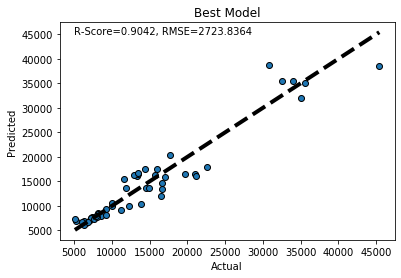

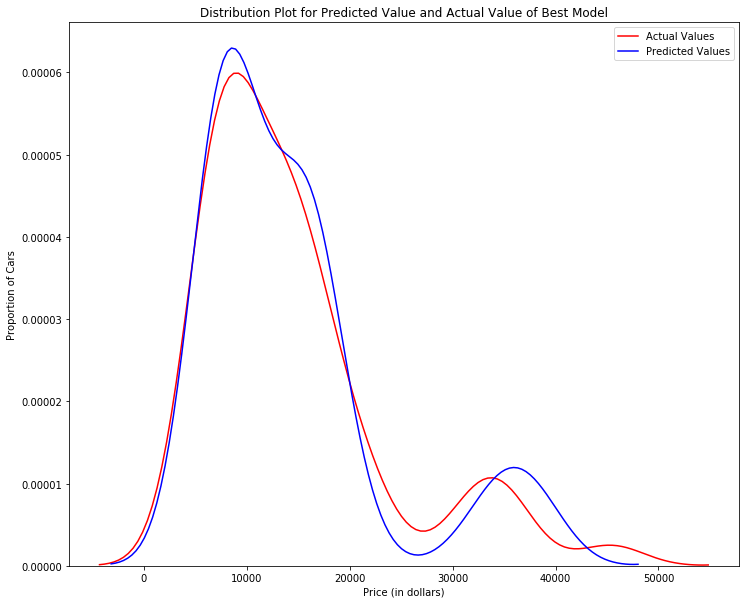

In [56]:
fig, ax = plt.subplots()
ax.scatter(y_test, final_predictions, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_title('Best Model')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.annotate('R-Score=0.9042, RMSE=2723.8364',
             xy=(5000, 45000),                  
            )
plt.show()
Title = 'Distribution Plot for Predicted Value and Actual Value of Best Model'
DistributionPlot(y_test, final_predictions,"Actual Values", "Predicted Values",Title)

Text(0, 0.5, 'Error of Prediction')

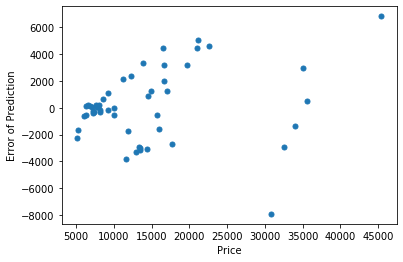

In [57]:
plt.scatter(y_test,y_test-final_predictions, s=25)
plt.xlabel('Price')
plt.ylabel('Error of Prediction')

In [58]:
final_predictions

array([16511.3       , 17498.2       , 13613.7       , 17570.6       ,
       12063.3       , 15847.3       ,  7682.2       , 16278.8       ,
        6478.2       , 16198.8       ,  9110.83333333, 18011.3       ,
       16422.        , 35424.2       ,  9996.9       , 10484.1       ,
        7046.1       , 10532.6       ,  7738.8       ,  9471.1       ,
       13604.2       , 16519.1       ,  6844.625     ,  7526.7       ,
        6871.1       , 35424.2       , 13426.        , 20385.5       ,
       38685.4       , 16210.        , 13604.2       ,  6141.9       ,
       15410.1       , 35078.4       ,  7576.2       ,  7415.96666667,
       16655.9       ,  8498.16666667,  8394.3       , 38565.9       ,
        7904.7       ,  7346.3       ,  7801.3       ,  8177.7       ,
        9944.23333333,  6707.2       ,  6743.2       ,  7903.4       ,
       16049.9       , 32068.7       , 14697.        ])

In [59]:
y_test

11     20970.0
99     14399.0
128    11850.0
175    15998.0
1      16500.0
111    17075.0
90      7349.0
177    15750.0
88      6649.0
187    13295.0
61     11245.0
200    22625.0
191    13415.0
123    32528.0
184     9995.0
188    13845.0
33      7129.0
171     9988.0
138     7775.0
84      9279.0
81     14489.0
102    19699.0
147     6338.0
34      7295.0
47      5195.0
124    34028.0
112    16630.0
6      17710.0
14     30760.0
190    12940.0
80     14869.0
18      6295.0
167    11549.0
45     35550.0
153     7198.0
119     7609.0
100    13499.0
83      8189.0
181     8195.0
71     45400.0
26      8558.0
134     5118.0
180     7995.0
158     9258.0
189    12290.0
89      6849.0
48      6095.0
116     7957.0
12     21105.0
69     35056.0
110    16695.0
Name: price, dtype: float64